In [2]:
import rlrom.utils as rlu
import polars as pl
import rlrom.plots as rlp
from rlrom.testers import RLTester
import matplotlib.pyplot as plt


2025-11-07 08:45:34.235911: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-07 08:45:34.600349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-07 08:45:35.629084: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical 

# Retesting

In [ ]:
cfg_wo= 'cfg0tr_with_obs.yml'
Two = RLTester(cfg_wo)
Two.retest_checkoints_models(df_idx=0, num_ep=100)
Two.retest_checkoints_models(df_idx=1, num_ep=100)
Two.retest_checkoints_models(df_idx=2, num_ep=100)


cfg_basic= 'cfg0tr.yml'
T = RLTester(cfg_basic)
T.retest_checkoints_models(df_idx=1, num_ep=100)
T.retest_checkoints_models(df_idx=2, num_ep=100)
T.retest_checkoints_models(df_idx=3, num_ep=100)



In [ ]:
cfg_rmf= 'cfg0tr_rmf.yml'
T = RLTester(cfg_rmf)
T.retest_checkoints_models(df_idx=-1, num_ep=100)
T.retest_checkoints_models(df_idx=-2, num_ep=100)
#T.retest_checkoints_models(df_idx=2, num_ep=100)
#T.retest_checkoints_models(df_idx=3, num_ep=100)


# Plotting

In [6]:
# load modules and data
import rlrom.utils as rlu
import polars as pl
import rlrom.plots as rlp
from rlrom.testers import RLTester
import matplotlib.pyplot as plt
%matplotlib ipympl

cfg0 = rlu.load_cfg('cfg0tr_rmf.yml')
df0 = rlu.get_df_training(cfg0, -3)
df1 = rlu.get_df_training(cfg0, -2)
df2 = rlu.get_df_training(cfg0, -1)


Imported module highway
loading field [ cfg_env ] from YAML file [ cfg_env.yml ]
loading field [ cfg_specs ] from YAML file [ cfg_specs_rmf.yml ]
loading field [ specs ] from STL file [ hw-env_specs.stl ]
loading field [ eval_formulas ] from YAML file [ cfg_eval.yml ]
loading field [ ppo ] from YAML file [ highway_env_ppo.yml ]
Imported module highway
Imported module highway
Imported module highway


/home/alex/workspace/rlrom/src/rlrom/plots.py:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/home/alex/workspace/rlrom/src/rlrom/plots.py:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/home/alex/workspace/rlrom/src/rlrom/plots.py:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/home/alex/workspace/rlrom/src/rlrom/plots.py:207: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/home/alex/workspace/rlrom/src/rlrom/plots.py:207: UserWarni

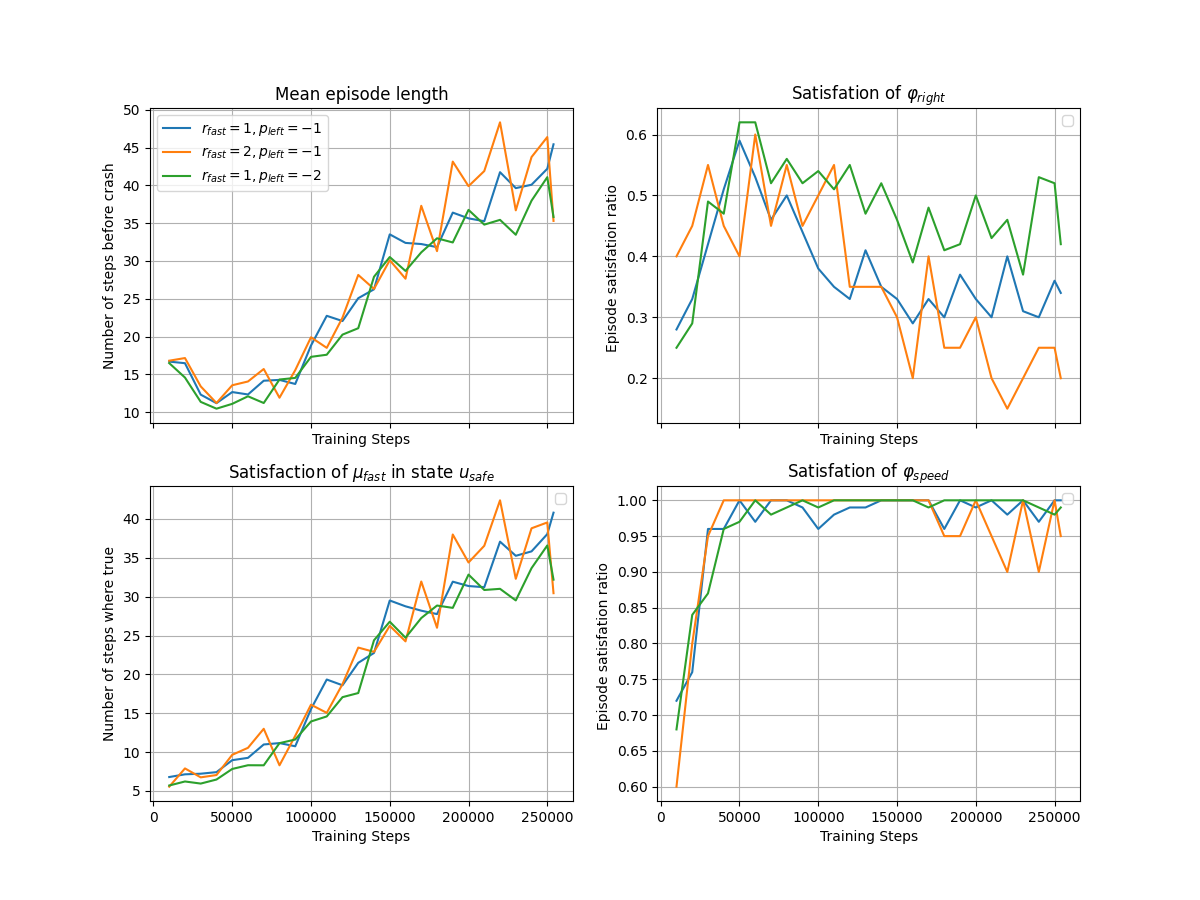

In [ ]:
plt.ioff()
fig, axs = plt.subplots(2,2, sharex=True, figsize=(12,9))
ax = axs[0][0]
ax.grid()
rlp.plot_df_training(df1,metric='mean_ep_len', label=r'$r_{fast}=1, p_{left}=-1$', ax=ax)
rlp.plot_df_training(df0,metric='mean_ep_len', label=r'$r_{fast}=2, p_{left}=-1$', ax=ax)
rlp.plot_df_training(df2,metric='mean_ep_len', label=r'$r_{fast}=1, p_{left}=-2$', ax=ax)
ax.set_ylabel(r'Number of steps before crash')
ax.set_title(r'Mean episode length')  

ax = axs[1][0]
ax.grid()    
ax = rlp.plot_df_training(df1,formula= 'fa_n_da', metric = 'mean_num_sat', label=None,ax=ax)
ax = rlp.plot_df_training(df0,formula= 'fa_n_da', metric = 'mean_num_sat', label=None,ax=ax)
ax = rlp.plot_df_training(df2,formula= 'fa_n_da', metric = 'mean_num_sat', label=None,ax=ax)    
ax.set_ylabel(r'Number of steps where true')
ax.set_title(r'Satisfaction of $\mu_{fast}$ in state $u_{safe}$')  

ax = axs[0][1]
ax.grid()
ax = rlp.plot_df_training(df1,formula= 'phi_right_lane', metric = 'ratio_init_sat', label=None,ax=ax)
ax = rlp.plot_df_training(df0,formula= 'phi_right_lane', metric = 'ratio_init_sat', label=None,ax=ax)
ax = rlp.plot_df_training(df2,formula= 'phi_right_lane', metric = 'ratio_init_sat', label=None,ax=ax)

ax.set_title(r'Satisfation of $\varphi_{right}$')
ax.set_ylabel(r'Episode satisfation ratio ')
#
ax = axs[1][1]
ax.grid()
ax = rlp.plot_df_training(df1,formula= 'phi_speed', metric = 'ratio_init_sat', label=None,ax=ax)
ax = rlp.plot_df_training(df0,formula= 'phi_speed', metric = 'ratio_init_sat', label=None,ax=ax)
ax = rlp.plot_df_training(df2,formula= 'phi_speed', metric = 'ratio_init_sat', label=None,ax=ax)
    
ax.set_title(r'Satisfation of $\varphi_{speed}$')
ax.set_ylabel(r'Episode satisfation ratio ')

fig.show()


In [42]:
path = '/mnt/c/Users/alex/Dropbox/Applications/Overleaf/ECC2026/figures/'
fig.savefig(fname=path+'hw_trainings.pdf',bbox_inches='tight')

In [ ]:

def plot_df_stuff(df, axs, label):
    ax = axs[0][0]
    ax = axs[1][0]    
    ax = axs[0][1]
    ax.grid()
    ax = rlp.plot_df_training(df,formula= 'phi_right_lane', metric = 'ratio_init_sat', label=label,ax=ax)
    ax.set_ylabel('satisfation ratio')
    ax.set_title('phi_right_lane')    
    ax = axs[1][1]
    ax.grid()
    ax = rlp.plot_df_training(df,formula= 'phi_speed', metric = 'ratio_init_sat', label=label,ax=ax)
    ax.set_title('phi_speed')

